# Loss functions for classification tasks

## General case: $n$ classes
- Predict vector of probabilities: $[p_{c = 1}, \ldots, p_{c=n}]$
- What we expect from the predicted probabilities:
    - Should be in [0, 1]
    - Should sum to 1
   

 
- How do we achieve this?
    - Use $n$ output neurons
    - softmax activations: $f(z) = \frac{\exp(z_i)}{\sum_j \exp(z_j)}$
    
- Using $n$ output neurons over-parametrizes the model, because the sum of probabilities
  must be 1
  - Not a problem in practice
  - c.f. Section 6.2.2 in the [deep learning book](https://www.deeplearningbook.org/contents/mlp.html).

## Special case: 2 classes
- Condition that probabilities sum to 1 allows us to use only 1 output neuron
    - $p_{c=2} = 1 - p_{c=1}$
- Now we only need to map output to [0, 1]
- This is achieved using a sigmoid activation function:
    - $\sigma(z) = \frac{1}{1 + \exp(-z)}$


## Loss functions in pytorch

In [7]:
import torch
from torch import nn

loss = nn.BCELoss()           # Binary classification, network with sigmoid
loss = nn.BCEWithLogitsLoss() # Binary classification, network without sigmoid
loss = nn.NLLLoss()           # N-class classification, network with softmax output
loss = nn.CrossEntropyLoss()  # N-class classification, network without softmax output

# Augmenting training data


In [2]:
from catsndogs.training import folder
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, ToTensor, Normalize

transform = Compose([ToTensor(),
                     Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
images = ImageFolder(folder, transform=transform)

- To monitor training progress, the data available for training is split
  into training and validation set

In [3]:
n_train = int(0.9 * len(images))
n_val = len(images) - n_train
training_data, validation_data = torch.utils.data.random_split(images, (n_train, n_val))

## Understanding `training_data` and `validation_data`

- Training data is split only by indices
- `training_data.indices` and `validation_data.indices` contain indices
  of images in each part
- When requested these images are taken from the dataset referenced in
  `training_data.dataset` and `validation_data.dataset`

## Understanding `training_data` and `validation_data`

- To modify only the training data, you have to replace the data
  in `training_data.dataset`
- As an example, we transform the training data to greyscale images


In [4]:
from torchvision.transforms import RandomGrayscale

transform = Compose([RandomGrayscale(1.0),
                     ToTensor(),
                     Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
images_augmented = ImageFolder(folder, transform=transform)
training_data.dataset = images_augmented # Snippet provided in exercise

In [5]:
from torchvision.transforms.functional import to_pil_image
# This function inverts the transformation of the input images.
def to_image(tensor):
    tensor = 0.5 * (tensor + 1.0)
    return to_pil_image(tensor)

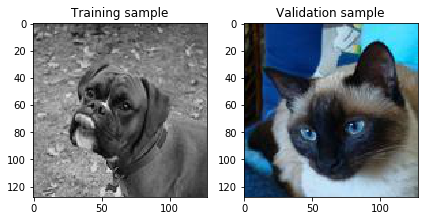

In [6]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(1, 2)
axs[0].imshow(to_image(training_data[0][0]))
axs[0].set_title("Training sample")
axs[1].imshow(to_image(validation_data[0][0]))
axs[1].set_title("Validation sample")
plt.tight_layout()